|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|gender|gender ||
|Age |Age in years| |
|sibsp |number of siblings / spouses aboard|	|
|parch |number of parents / children aboard| |
|ticket|Ticket number ||
|fare | fare| 	|
|cabin |Cabin number|	|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | Lifeboat||
|body | Body Identification Number||
|home.dest| Home/destination||

- Read data and describe it
- Find columns with missingdata
- Print shape of dataset
- drop columns with more than 25% missing data
- drop columns having independent values(which do not affect the survival rate).


- check data types of all columns
- convert price to numeric
- find columns still having missing/na values and also count of missing data
- fill na with mean for fare and age column column.
- drop na values for embarked column.
- dump the dataframe to a csv file 'titanic_filtered.csv'.


- for surviced column replace 0 with D and 1 with A
- find the frequency of different values in survived column
- group by gender and survived and see the counts in each category
- find different pclass and no of people in each class

- find top 5 people with highest values of age. Count no of male and females in the top 5
- find max age male and female who survived
- get average age by gender
- get average age by people survived vs not-survived

In [1]:
#Read data and describe it
#Find columns with missingdata
#Print shape of dataset
#drop columns with more than 25% missing data
#drop columns having independent values(which do not affect the survival rate).


#check data types of all columns
#convert price to numeric
#find columns still having missing/na values and also count of missing data
#fill na with mean for fare and age column column.
#drop na values for embarked column.
#dump the dataframe to a csv file 'titanic_filtered.csv'.


#for surviced column replace 0 with D and 1 with A
#find the frequency of different values in survived column
#group by gender and survived and see the counts in each category
#find different pclass and no of people in each class

#find top 5 people with highest values of age. Count no of male and females in the top 5
#find max age male and female who survived
#get average age by gender
#get average age by people survived vs not-survived

In [2]:
import pandas as pd
print(dir(pd))

['Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseDtype', 'SparseSeries', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_lib', '_libs', '_np_version_under1p14', '_np_version_under1p15', '_np_version_under1p16', '_np_version_under1p17', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_rang

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/leangaurav/dsc_weekend_2020_03_01/master/Titanic/titanic_dataset.csv')
print(df.describe(include='all'))

         Unnamed: 0       pclass     survived                  name gender  \
count   1309.000000  1309.000000  1309.000000                  1309   1309   
unique          NaN          NaN          NaN                  1307      2   
top             NaN          NaN          NaN  Connolly, Miss. Kate   male   
freq            NaN          NaN          NaN                     2    843   
mean     654.000000     2.294882     0.381971                   NaN    NaN   
std      378.020061     0.837836     0.486055                   NaN    NaN   
min        0.000000     1.000000     0.000000                   NaN    NaN   
25%      327.000000     2.000000     0.000000                   NaN    NaN   
50%      654.000000     3.000000     0.000000                   NaN    NaN   
75%      981.000000     3.000000     1.000000                   NaN    NaN   
max     1308.000000     3.000000     1.000000                   NaN    NaN   

                age        sibsp        parch    ticket    fare

In [4]:
print(df)

      Unnamed: 0  pclass  survived  \
0              0       1         1   
1              1       1         1   
2              2       1         0   
3              3       1         0   
4              4       1         0   
...          ...     ...       ...   
1304        1304       3         0   
1305        1305       3         0   
1306        1306       3         0   
1307        1307       3         0   
1308        1308       3         0   

                                                 name  gender      age  sibsp  \
0                       Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                      Allison, Master. Hudson Trevor    male   0.9167      1   
2                        Allison, Miss. Helen Loraine  female   2.0000      1   
3                Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   
...                                               ...    

In [5]:
print(df.columns) # columns
print(df.dtypes)
print(df.index) # rows
print(df.shape)
print(df.size)

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')
Unnamed: 0      int64
pclass          int64
survived        int64
name           object
gender         object
age           float64
sibsp           int64
parch           int64
ticket         object
fare           object
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object
RangeIndex(start=0, stop=1309, step=1)
(1309, 15)
19635


In [6]:
print(df.isna().any())
print(df.isna().sum())

Unnamed: 0    False
pclass        False
survived      False
name          False
gender        False
age            True
sibsp         False
parch         False
ticket        False
fare           True
cabin          True
embarked       True
boat           True
body           True
home.dest      True
dtype: bool
Unnamed: 0       0
pclass           0
survived         0
name             0
gender           0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64


In [7]:
print(df.head())

   Unnamed: 0  pclass  survived  \
0           0       1         1   
1           1       1         1   
2           2       1         0   
3           3       1         0   
4           4       1         0   

                                              name  gender      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                   Allison, Master. Hudson Trevor    male   0.9167      1   
2                     Allison, Miss. Helen Loraine  female   2.0000      1   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   

   parch  ticket      fare    cabin embarked boat   body  \
0      0   24160  $211.34        B5        S    2    NaN   
1      2  113781  $151.55   C22 C26        S   11    NaN   
2      2  113781  $151.55   C22 C26        S  NaN    NaN   
3      2  113781  $151.55   C22 C26        S  NaN  135.0   
4      2  113781  $1

In [8]:
df.dropna(axis  = 1, thresh = int(1309*(0.75)) , inplace = True)
print(df.columns)
# Lets say a data frame df 10 rows colums a,b
# Values available a - > 8   b->4, c->10 . Remaining are NA
# drop columns with data less than 8 elements / keep only those which have atleast 8 elements
#  df.dropna(axis  = 1, thresh = 8 , inplace = True)

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')


In [9]:
df.drop(columns =  ['Unnamed: 0','name',  'ticket'] , inplace = True)
print(df.columns)

Index(['pclass', 'survived', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


In [10]:

#check data types of all columns
print(df.dtypes)

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object


In [11]:
# convert price to numeric
print(df.fare.head())
print(dir(df.fare.str))
print(df.fare.dtype)
df.fare = df.fare.str.replace('$','')
#r =  df.fare.replace('\$','', regex  = True) # using regex

print()
print(df.fare.head())
df.fare = df.fare.astype('float')
print(df.dtypes)

0    $211.34 
1    $151.55 
2    $151.55 
3    $151.55 
4    $151.55 
Name: fare, dtype: object
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_doc_args', '_freeze', '_get_series_list', '_inferred_dtype', '_is_categorical', '_make_accessor', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'casefold', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'repeat', 'r

In [12]:

#find columns still having missing/na values and also count of missing 
print(df.isna().sum())
print(df.count())

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64
pclass      1309
survived    1309
gender      1309
age         1046
sibsp       1309
parch       1309
fare        1308
embarked    1307
dtype: int64


In [13]:

#fill na with mean for fare and age column column.
df.fillna({'fare': df.fare.mean(), 'age': df.age.mean()}, inplace = True)
# df.dropna(axis  = 0, how='any')
print(df.isna().sum())

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64


In [14]:
#drop na values for embarked column.
df.dropna(axis = 0, how = 'any', inplace = True)
print(df.isna().sum())
print(df.shape)

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
(1307, 8)


                 pclass  age  sibsp  parch  fare  embarked
gender survived                                           
female 0            127  127    127    127   127       127
       1            337  337    337    337   337       337
male   0            682  682    682    682   682       682
       1            161  161    161    161   161       161


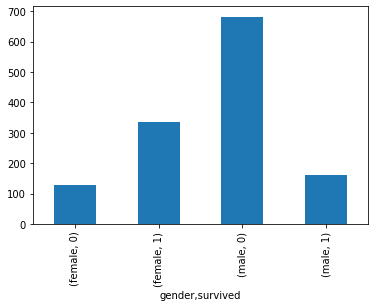

In [29]:

#dump the dataframe to a csv file 'titanic_filtered.csv'.
df.to_csv('titanic_filtered.csv')
grp = df.groupby(by=['gender', 'survived'])
print(grp.count())
grp.count().pclass.plot(kind = 'bar')
plt.show()


In [16]:
#for surviced column replace 0 with D and 1 with A
#find the frequency of different values in survived column
#group by gender and survived and see the counts in each category
#find different pclass and no of people in each class

#find top 5 people with highest values of age. Count no of male and females in the top 5
#find max age male and female who survived
#get average age by gender
#get average age by people survived vs not-survived

S    914
C    270
Q    123
Name: embarked, dtype: int64
<class 'pandas.core.series.Series'>
0    809
1    498
Name: survived, dtype: int64


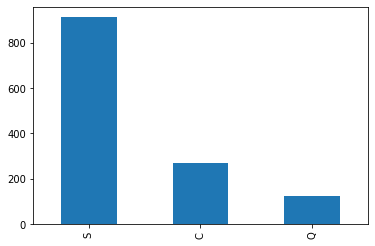

In [22]:
s = df.embarked.value_counts()
print(s)
print(type(s))
print(df.survived.value_counts())
import matplotlib.pyplot as plt
s.plot(kind = 'bar')
plt.show()

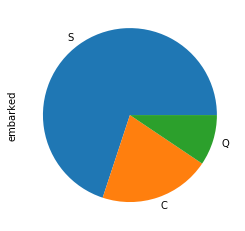

In [24]:
s.plot(kind = 'pie')
plt.show()

In [ ]:
s=df.gender.value_counts()
print(s)
s.plot(kind ='bar')
plt.show()


In [46]:
s = df.pclass.value_counts()
print(s)
print()
print(s.values)
print()
print(s.index)
print()
print(s.index.values)

print()
print(df.pclass.unique())

3    709
1    321
2    277
Name: pclass, dtype: int64

[709 321 277]

Int64Index([3, 1, 2], dtype='int64')

[3 1 2]

[1 2 3]


In [52]:
df1 = df.sort_values(by='age', ascending=False)
print(df1.head())
r=df1.head()

print()
print(r.gender.value_counts())

# 
print()
df2 = df.nlargest(5, columns=['age'])
print(df2)
print(df2.index)

      pclass  survived  gender   age  sibsp  parch   fare embarked
14         1         1    male  80.0      0      0  30.00        S
61         1         1  female  76.0      1      0  78.85        S
1235       3         0    male  74.0      0      0   7.78        S
135        1         0    male  71.0      0      0  34.65        C
9          1         0    male  71.0      0      0  49.50        C

male      4
female    1
Name: gender, dtype: int64

      pclass  survived  gender   age  sibsp  parch   fare embarked
14         1         1    male  80.0      0      0  30.00        S
61         1         1  female  76.0      1      0  78.85        S
1235       3         0    male  74.0      0      0   7.78        S
9          1         0    male  71.0      0      0  49.50        C
135        1         0    male  71.0      0      0  34.65        C
Int64Index([14, 61, 1235, 9, 135], dtype='int64')


In [55]:
s = df.survived.replace({0:'D', 1:'A'})
df.survived = s
print(df.head())

   pclass survived  gender      age  sibsp  parch    fare embarked
0       1        A  female  29.0000      0      0  211.34        S
1       1        A    male   0.9167      1      2  151.55        S
2       1        D  female   2.0000      1      2  151.55        S
3       1        D    male  30.0000      1      2  151.55        S
4       1        D  female  25.0000      1      2  151.55        S


In [57]:
# apply a operation element by element
df.pclass.transform(lambda x : x *10)
df.pclass.apply(lambda x : x *10)

0       10
1       10
2       10
3       10
4       10
        ..
1304    30
1305    30
1306    30
1307    30
1308    30
Name: pclass, Length: 1307, dtype: int64

In [ ]:
df.survived =df.survived.apply(lambda x: 'A' if 1 else 'D')
df.survived =df.survived.apply(lambda x: {0:'D', 1:'A', 2 :'B'}[x] )


In [60]:
n1,n2 = int(input()), int(input())

l = n1 if n1 > n2 else n2
print(l)

44
55
55


In [ ]:
#find max age male and female who survived
#get average age by gender
#get average age by people survived vs not-survived

In [63]:
print(df.head())
grp = df.groupby(by = ['gender'])
print(dir(grp))

   pclass survived  gender      age  sibsp  parch    fare embarked
0       1        A  female  29.0000      0      0  211.34        S
1       1        A    male   0.9167      1      2  151.55        S
2       1        D  female   2.0000      1      2  151.55        S
3       1        D    male  30.0000      1      2  151.55        S
4       1        D  female  25.0000      1      2  151.55        S
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_numeric_operations', '_agg_examples_doc', '_agg_see_also_doc', '_aggregate', '_aggregate_generic', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_

In [66]:
print(df.head())
grp = df.groupby(by = ['gender'])
print(grp.groups)
print(grp.age.mean())

   pclass survived  gender      age  sibsp  parch    fare embarked
0       1        A  female  29.0000      0      0  211.34        S
1       1        A    male   0.9167      1      2  151.55        S
2       1        D  female   2.0000      1      2  151.55        S
3       1        D    male  30.0000      1      2  151.55        S
4       1        D  female  25.0000      1      2  151.55        S
{'female': Int64Index([   0,    2,    4,    6,    8,   11,   12,   13,   17,   18,
            ...
            1265, 1267, 1273, 1276, 1279, 1286, 1290, 1300, 1304, 1305],
           dtype='int64', length=464), 'male': Int64Index([   1,    3,    5,    7,    9,   10,   14,   15,   16,   19,
            ...
            1296, 1297, 1298, 1299, 1301, 1302, 1303, 1306, 1307, 1308],
           dtype='int64', length=843)}
gender
female    28.795931
male      30.430716
Name: age, dtype: float64
